

*   **Rishabh Patil**
*   **SAP : 60009200056**
*   **Div : K/K2**





# Import required libraries

In [ ]:
!pip install arch -q

     |████████████████████████████████| 903 kB 9.2 MB/s 


In [ ]:
import warnings

import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline
warnings.filterwarnings("ignore")

# Import Data

In [ ]:
df = pd.read_csv(r'/content/daily-min-temperatures.csv', parse_dates = True)

In [ ]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


# Functions for plotting PACF Graph and predicting volatility values

In [ ]:
def exp9(column_name,p,q):
  print("\n",column_name, "Graph")
  df[column_name].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(column_name)
  plt.title(column_name)
  plt.show()

  new_df = df[column_name]

  print("\nPACF Graph")
  plot_pacf(new_df)
  plt.show()

  test_size = 30
  train, test = new_df[:-test_size], new_df[-test_size:]

  model = arch_model(train, p=p, q=q)
  model_fit = model.fit()
  print(model_fit.summary())

def predict_volatility(column_name, p, q):
  new_df = df[column_name]
  rolling_predictions = []
  test_size = 30

  for i in range(test_size):
    train = new_df[:-(test_size-i)]

    model = arch_model(train, p=p, q=q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-test_size:])

  plt.figure(figsize=(10,4)) 
  true, = plt.plot(df[column_name][-test_size:])
  preds, = plt.plot(rolling_predictions) 
  plt.title('Volatility Prediction - Rolling forecast', fontsize=20) 
  plt.legend([ 'True Volatility', 'Predicted Volatility'], fontsize=16) 


 Temp Graph


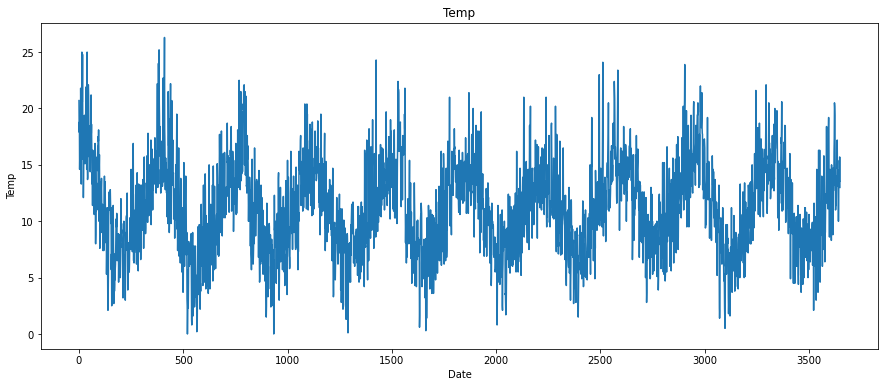


PACF Graph


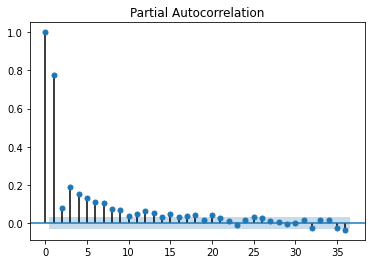

Iteration:      1,   Func. Count:      6,   Neg. LLF: 79624697872.63147
Iteration:      2,   Func. Count:     13,   Neg. LLF: 10061.464834740842
Iteration:      3,   Func. Count:     19,   Neg. LLF: 102574.00411804674
Iteration:      4,   Func. Count:     25,   Neg. LLF: 11300.823206193229
Iteration:      5,   Func. Count:     31,   Neg. LLF: 9876.564710957166
Iteration:      6,   Func. Count:     36,   Neg. LLF: 11596.28668203588
Iteration:      7,   Func. Count:     43,   Neg. LLF: 9857.515931163141
Iteration:      8,   Func. Count:     48,   Neg. LLF: 9853.591741421076
Iteration:      9,   Func. Count:     53,   Neg. LLF: 9852.353092970647
Iteration:     10,   Func. Count:     58,   Neg. LLF: 9852.259518959021
Iteration:     11,   Func. Count:     63,   Neg. LLF: 9852.257902636837
Iteration:     12,   Func. Count:     68,   Neg. LLF: 9852.257724884279
Iteration:     13,   Func. Count:     73,   Neg. LLF: 9852.257554427248
Iteration:     14,   Func. Count:     78,   Neg. LLF: 9852.25

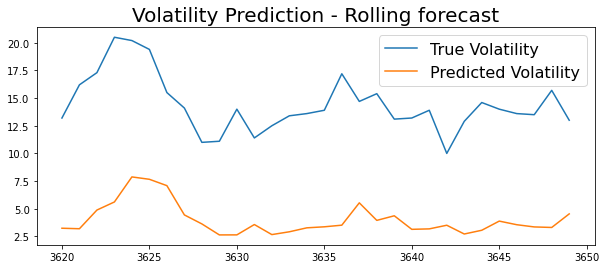

In [ ]:
exp9("Temp",1,1)
print("\nPredicting volatility")
predict_volatility("Temp", 1,1)